# **Importing necessary libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**


In [2]:
df=pd.read_csv(r'/content/drive/MyDrive/datasets for python/Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df.shape

(7324, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7324 entries, 0 to 9372
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   7324 non-null   object 
 1   price       7324 non-null   float64
 2   city        7324 non-null   object 
 3   kms_driven  7324 non-null   float64
 4   owner       7324 non-null   object 
 5   age         7324 non-null   float64
 6   power       7324 non-null   float64
 7   brand       7324 non-null   object 
dtypes: float64(4), object(4)
memory usage: 515.0+ KB


# EDA


In [6]:
df.isnull().sum().sort_values(ascending=False)

,0
bike_name,0
price,0
city,0
kms_driven,0
owner,0
age,0
power,0
brand,0


In [7]:
df.describe()

,price,kms_driven,age,power
count,7.324000e+03,7324.000000,7324.000000,7324.000000
mean,8.488390e+04,23910.496587,6.656472,228.133397
std,1.209662e+05,27317.594631,3.605299,158.324219
min,4.400000e+03,1.000000,1.000000,100.000000
25%,3.000000e+04,10155.750000,4.000000,125.000000
50%,5.500000e+04,19000.000000,6.000000,160.000000
75%,1.000000e+05,30112.000000,8.000000,350.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [8]:
df.drop(['bike_name'],axis=1,inplace=True)

In [9]:
df.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [10]:
df_new  = df.copy()

In [11]:
df_new['brand'].value_counts()[df_new['brand'].value_counts()>500]

,count
brand,
Bajaj,2081
Royal Enfield,1346
Hero,1142
Honda,676
Yamaha,651


In [12]:

df_new = df_new.groupby('brand').filter(lambda x: len(x)>500)


In [13]:
df_new.shape

(5896, 7)

In [14]:
df_new.sample(11)

,price,city,kms_driven,owner,age,power,brand
717,150000.0,Chennai,3300.0,First Owner,4.0,400.0,Bajaj
365,146000.0,Hyderabad,4700.0,First Owner,5.0,410.0,Royal Enfield
2198,100000.0,Solapur,6500.0,First Owner,5.0,150.0,Honda
4585,35000.0,Pune,40000.0,Second Owner,24.0,135.0,Yamaha
5893,25000.0,Faridabad,78309.0,First Owner,9.0,150.0,Yamaha
5008,101697.0,Bangalore,7734.0,First Owner,4.0,200.0,Bajaj
3570,120000.0,Bangalore,9236.0,First Owner,4.0,200.0,Bajaj
8621,15000.0,Rajkot,28000.0,First Owner,12.0,180.0,Bajaj
1774,25000.0,Pune,86283.0,Third Owner,10.0,150.0,Bajaj
3472,47000.0,Sonipat,31500.0,First Owner,5.0,220.0,Bajaj


In [15]:
df_new=df_new.groupby('city').filter(lambda x: len(x)>100)

owner
First Owner             4029
Second Owner             338
Third Owner               38
Fourth Owner Or More       7
Name: count, dtype: int64


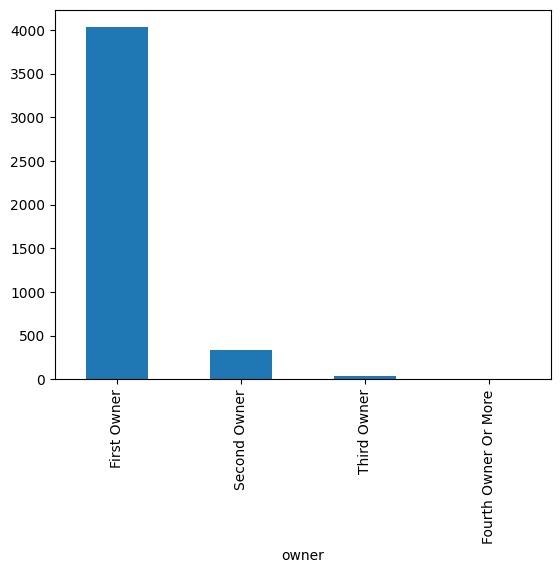

In [16]:
df_new['owner'].value_counts().plot(kind='bar')
print(df_new['owner'].value_counts())

owner
New Owner               4029
Second_or_more_Owner     383
Name: count, dtype: int64


<Axes: xlabel='owner'>

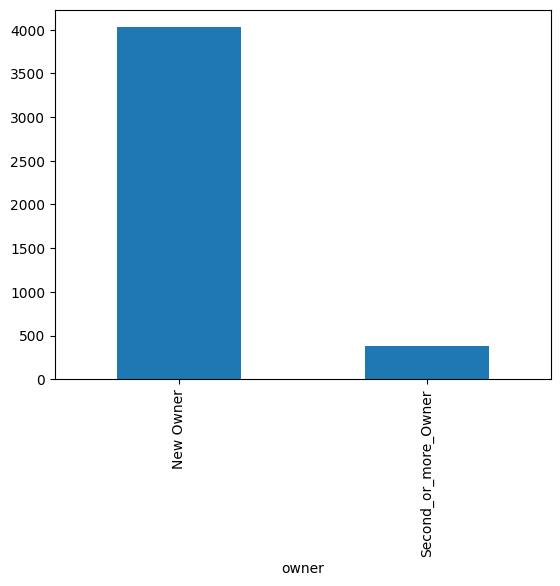

In [17]:

df_new['owner'] = df_new['owner'].replace({'First Owner':'New Owner','Third Owner': 'Second_or_more_Owner', 'Second Owner': 'Second_or_more_Owner','Fourth Owner Or More':'Second_or_more_Owner'})
print(df_new['owner'].value_counts())
df_new['owner'].value_counts().plot(kind='bar')

In [18]:
#treating outliers for price(target)
min_value=df_new['price'].mean()-3*df['price'].std()
max_value=df_new['price'].mean()+3*df['price'].std()
df_new=df_new[(df_new['price']>=min_value) & (df_new['price']<=max_value)]

In [19]:
#treating outliers for age
min_value=df_new['age'].mean()-3*df['age'].std()
max_value=df_new['age'].mean()+3*df['age'].std()
df_new=df_new[(df_new['age']>=min_value) & (df_new['age']<=max_value)]

In [20]:
#treating outliers for power
min_value=df_new['power'].mean()-3*df['power'].std()
max_value=df_new['power'].mean()+3*df['power'].std()
df_new=df_new[(df_new['power']>=min_value) & (df_new['power']<=max_value)]

In [21]:
#treating outliers for kms_driven
min_value=df_new['kms_driven'].mean()-3*df['kms_driven'].std()
max_value=df_new['kms_driven'].mean()+3*df['kms_driven'].std()
df_new=df_new[(df_new['kms_driven']>=min_value) & (df_new['kms_driven']<=max_value)]

In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4351 entries, 1 to 9372
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       4351 non-null   float64
 1   city        4351 non-null   object 
 2   kms_driven  4351 non-null   float64
 3   owner       4351 non-null   object 
 4   age         4351 non-null   float64
 5   power       4351 non-null   float64
 6   brand       4351 non-null   object 
dtypes: float64(4), object(3)
memory usage: 271.9+ KB


In [23]:
numerical_columns = ['price', 'kms_driven', 'age', 'power']
correlation_with_price = df[numerical_columns].corr()
print(correlation_with_price['price'])

price         1.000000
kms_driven   -0.199951
age          -0.248752
power         0.807641
Name: price, dtype: float64


<Axes: ylabel='brand'>

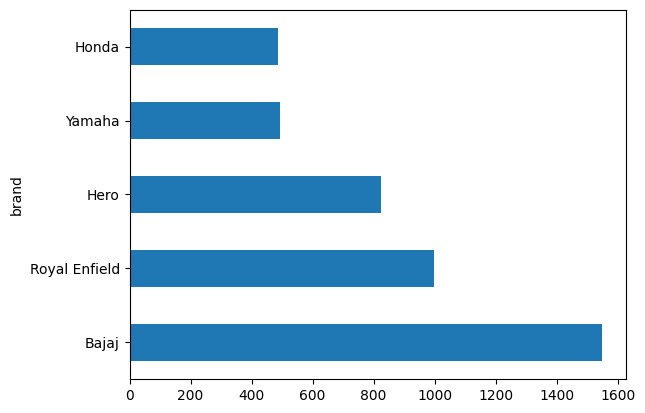

In [24]:
df_new['brand'].value_counts().plot(kind='barh')

<Axes: ylabel='brand'>

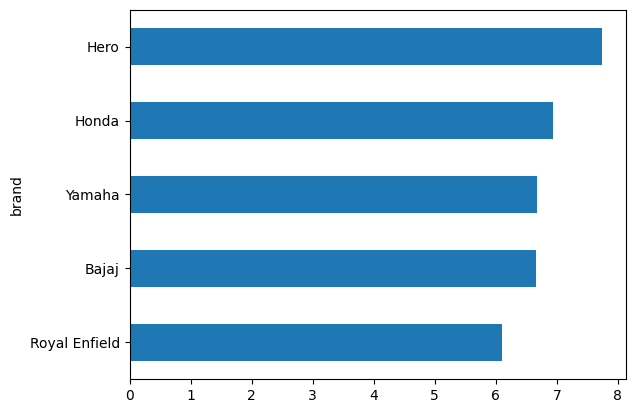

In [25]:
df_new.groupby('brand')['age'].mean().sort_values().plot(kind="barh")

<Axes: ylabel='brand'>

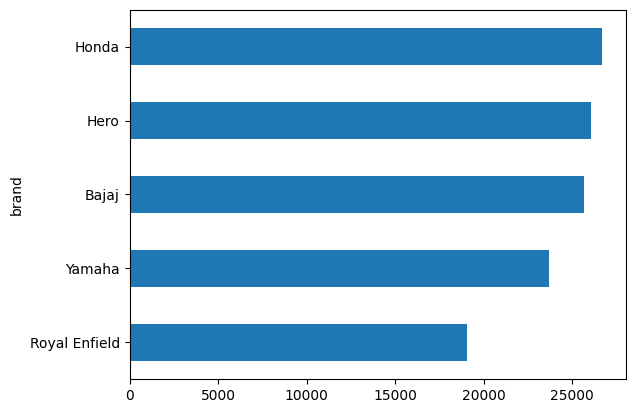

In [26]:
df_new.groupby('brand')['kms_driven'].mean().sort_values().plot(kind="barh")

<Axes: ylabel='brand'>

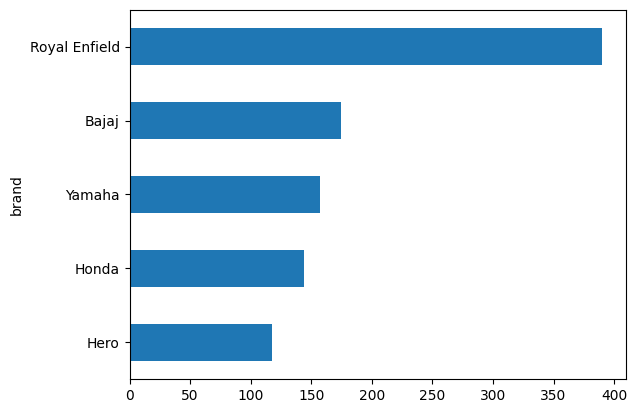

In [27]:
df_new.groupby('brand')['power'].mean().sort_values().plot(kind="barh")

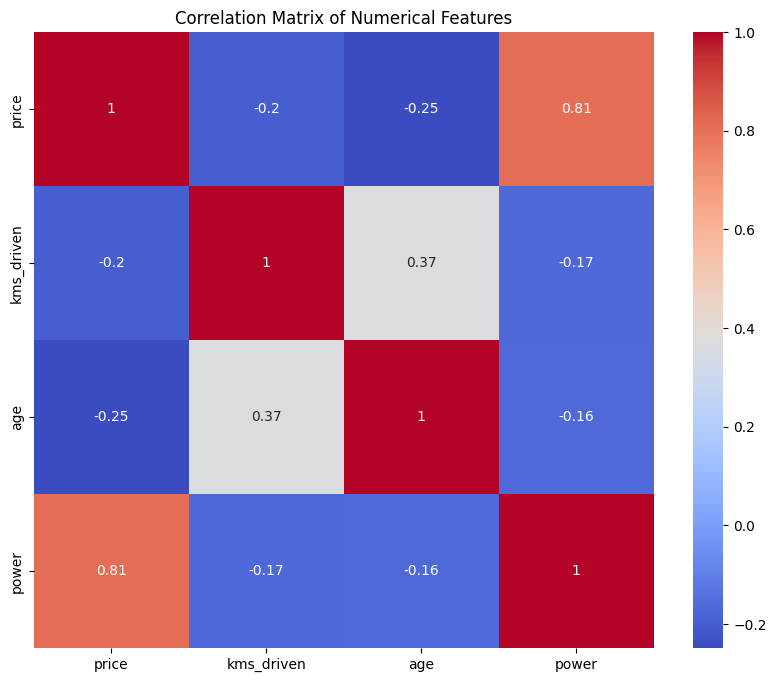

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4351 entries, 1 to 9372
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       4351 non-null   float64
 1   city        4351 non-null   object 
 2   kms_driven  4351 non-null   float64
 3   owner       4351 non-null   object 
 4   age         4351 non-null   float64
 5   power       4351 non-null   float64
 6   brand       4351 non-null   object 
dtypes: float64(4), object(3)
memory usage: 271.9+ KB


In [30]:
df_new = pd.get_dummies(df_new, columns=['owner', 'brand', 'city'],drop_first=True,dtype=int)
print(df_new.shape)

(4351, 20)


In [31]:
df_new.head()

,price,kms_driven,age,power,owner_Second_or_more_Owner,brand_Hero,brand_Honda,brand_Royal Enfield,brand_Yamaha,city_Bangalore,city_Chennai,city_Delhi,city_Faridabad,city_Ghaziabad,city_Gurgaon,city_Hyderabad,city_Jaipur,city_Mumbai,city_Noida,city_Pune
1,119900.0,11000.0,4.0,350.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,80000.0,10000.0,3.0,150.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
5,53499.0,25000.0,6.0,150.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
6,85000.0,8200.0,3.0,160.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7,45000.0,12645.0,3.0,100.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [32]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4351 entries, 1 to 9372
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       4351 non-null   float64
 1   kms_driven                  4351 non-null   float64
 2   age                         4351 non-null   float64
 3   power                       4351 non-null   float64
 4   owner_Second_or_more_Owner  4351 non-null   int64  
 5   brand_Hero                  4351 non-null   int64  
 6   brand_Honda                 4351 non-null   int64  
 7   brand_Royal Enfield         4351 non-null   int64  
 8   brand_Yamaha                4351 non-null   int64  
 9   city_Bangalore              4351 non-null   int64  
 10  city_Chennai                4351 non-null   int64  
 11  city_Delhi                  4351 non-null   int64  
 12  city_Faridabad              4351 non-null   int64  
 13  city_Ghaziabad              4351 non-n

Train test split  

In [33]:
X=df_new.drop(['price'],axis=1)
y=df_new['price']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4351, 19)
(4351,)
(3045, 19)
(3045,)
(1306, 19)
(1306,)


## **LINEAR REGRESSION**

In [37]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


mse = mean_squared_error(y_test,y_pred)
#print('The Mean Squared error is : ', mse)
#print('The r2_score:',r2_score(y_test,y_pred))
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_lr = 1 - (1 - r2_score(y_test,y_pred)) * (n - 1) / (n - p - 1)
rmse_lr = np.sqrt(mean_squared_error(y_test,y_pred))
print('The adjusted r2 score:', adjusted_r2_lr)
print('The RMSE is:',rmse_lr)

The adjusted r2 score: 0.806101891475665
The RMSE is: 18198.946274118935


In [38]:
residual = y_test - y_pred

the residuals are distributed around the zero


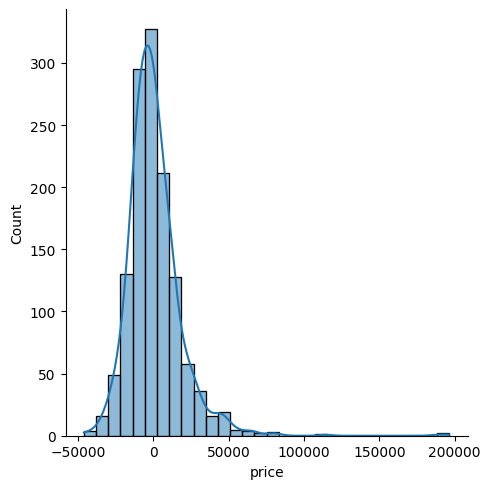

In [39]:
sns.displot(residual,bins=30,kde = True )
print('the residuals are distributed around the zero')

# **KNN REGRESSOR**

In [40]:
#KNN REGRESSOR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [41]:
knr=KNeighborsRegressor()
scaler=StandardScaler()

In [42]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [43]:
error_rate = []
for i in range(1, 20):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(scaled_X_train, y_train)
    pred_i = knr.predict(scaled_X_test)
    error_rate.append(mean_squared_error(y_test, pred_i))

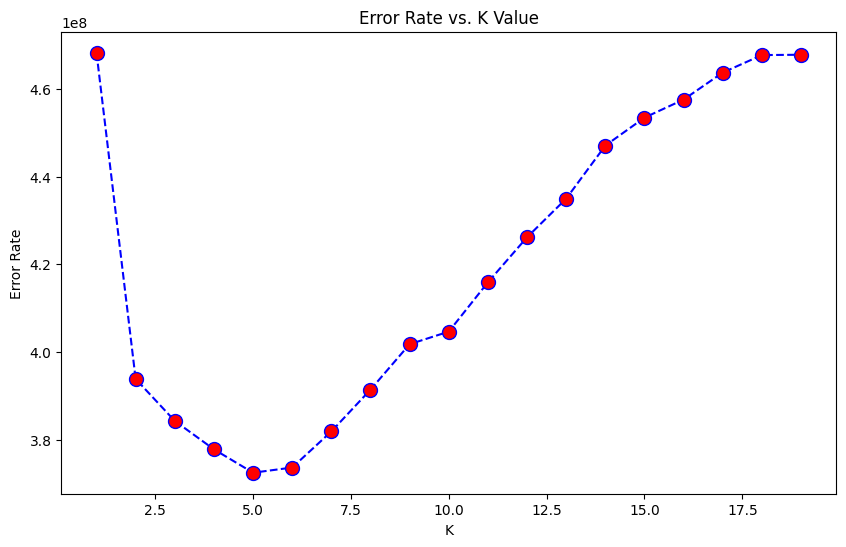

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [45]:
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(scaled_X_train,y_train)

KNeighborsRegressor()

In [46]:
y_pred = knr.predict(scaled_X_test)

In [47]:
mse = mean_squared_error(y_test,y_pred)
#print('The Mean Squared error is : ', mse)
rmse_knn=np.sqrt(mse)
print('The Root Mean Squared error is : ', rmse_knn)
#print('The R2 Score is : ', r2_score(y_test,y_pred))
adjusted_r2_score_knn = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print('the adjusted r2_score_knnr: ',adjusted_r2_score_knn)

The Root Mean Squared error is :  19298.586771024045
the adjusted r2_score_knnr:  0.7819620447253315


# **Ridge and Lasso regression**

In [48]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

adjusted_r2_score_ridge= 1 - (1 - r2_score(y_test, y_pred_ridge)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse_ridge=np.sqrt(mean_squared_error(y_test,y_pred_ridge))

print("Ridge Regression:")
print('the adjusted r2_score_ridge: ',adjusted_r2_score_ridge)
print('The RMSE is:',rmse_ridge)


# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

adjusted_r2_score_lasso= 1 - (1 - r2_score(y_test, y_pred_lasso)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse_lasso=np.sqrt(mean_squared_error(y_test,y_pred_lasso))

print("\nLasso Regression:")
print('the adjusted r2_score_lasso:',adjusted_r2_score_lasso)
print('The RMSE is:',rmse_lasso)

Ridge Regression:
the adjusted r2_score_ridge:  0.8061101611981067
The RMSE is: 18198.558178947966

Lasso Regression:
the adjusted r2_score_lasso: 0.8061051152840154
The RMSE is: 18198.79498290913


# **DECISION TREE REGRESSOR**


In [49]:
from sklearn.tree import DecisionTreeRegressor , plot_tree
dtree = DecisionTreeRegressor()

adjusted_r2_score_dt= []
# max_depth = []

for i in range(1,21):
    dtree = DecisionTreeRegressor(max_depth=i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    adjusted_r2_score_dtree= 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test)- X_test.shape[1] - 1)

    adjusted_r2_score_dt.append(adjusted_r2_score_dtree)

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), r2, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Regressor: R2 Score vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('adjusted R2 Score')
plt.grid(True)
plt.show()



NameError: name 'r2' is not defined

<Figure size 1000x600 with 0 Axes>

In [51]:
dff = pd.DataFrame(index = range(1,len(adjusted_r2_score_dt)+1) , data = adjusted_r2_score_dt,columns=['adjusted_r2_score_dt'])

In [52]:

dff.sort_values(ascending=False , by = 'adjusted_r2_score_dt').head(10)

,adjusted_r2_score_dt
6,0.841459
5,0.836185
10,0.828164
9,0.827759
7,0.827757
12,0.821993
8,0.818673
11,0.815001
4,0.813388
13,0.805708


In [53]:
print('Therefore Max R2 score is {} at Max_depth {}'.format(round(max(dff['adjusted_r2_score_dt']),4),dff['adjusted_r2_score_dt'].idxmax() ))

Therefore Max R2 score is 0.8415 at Max_depth 6


In [54]:
dtree = DecisionTreeRegressor(max_depth=5)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [57]:
y_pred = dtree.predict(X_test)

In [58]:
mse = mean_squared_error(y_test,y_pred)
#print('The Mean Squared error is : ', mse)
rmse_dtree=np.sqrt(mse)
print('The Root Mean Squared error is : ', rmse_dtree)
adjusted_r2_score_dtree= 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test)- X_test.shape[1] - 1)
print('The adjusted_r2_score_dtree is : ',adjusted_r2_score_dtree)

The Root Mean Squared error is :  16734.554829217457
The adjusted_r2_score_dtree is :  0.8360507575289298


## **# RANDOM FOREST REGRESSOR**


In [59]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred))
print('The Root Mean Squared error is : ', rmse_rf)
adjusted_r2_score_rf= 1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test)- X_test.shape[1] - 1)
print('The adjusted_r2_score_rf is : ',adjusted_r2_score_rf)


The Root Mean Squared error is :  15033.935710624535
The adjusted_r2_score_rf is :  0.8676797038379193


In [60]:
adjusted_r2_scores = {
    'Linear Regression':adjusted_r2_lr,
     'KNN Regressor':adjusted_r2_score_knn,
    'Ridge Regression': adjusted_r2_score_ridge,
    'Lasso Regression':adjusted_r2_score_lasso,
    'Decision Tree Regressor': adjusted_r2_score_dtree,
    'Random Forest Regressor': adjusted_r2_score_rf
}
rmse_scores = {
    'Linear Regression':rmse_lr,
     'KNN Regressor':rmse_knn,
    'Ridge Regression': rmse_ridge,
    'Lasso Regression':rmse_lasso,
    'Decision Tree Regressor': rmse_dtree,
    'Random Forest Regressor': rmse_rf
}

df_adjusted_r2 = pd.DataFrame.from_dict(adjusted_r2_scores, orient='index', columns=['Adjusted R2 Score'])
df_rmse = pd.DataFrame.from_dict(rmse_scores, orient='index', columns=['RMSE'])

df_results = pd.concat([df_adjusted_r2, df_rmse], axis=1)
df_results=df_results.sort_values(by='Adjusted R2 Score',ascending=False)
df_results

,Adjusted R2 Score,RMSE
Random Forest Regressor,0.867680,15033.935711
Decision Tree Regressor,0.836051,16734.554829
Ridge Regression,0.806110,18198.558179
Lasso Regression,0.806105,18198.794983
Linear Regression,0.806102,18198.946274
KNN Regressor,0.781962,19298.586771


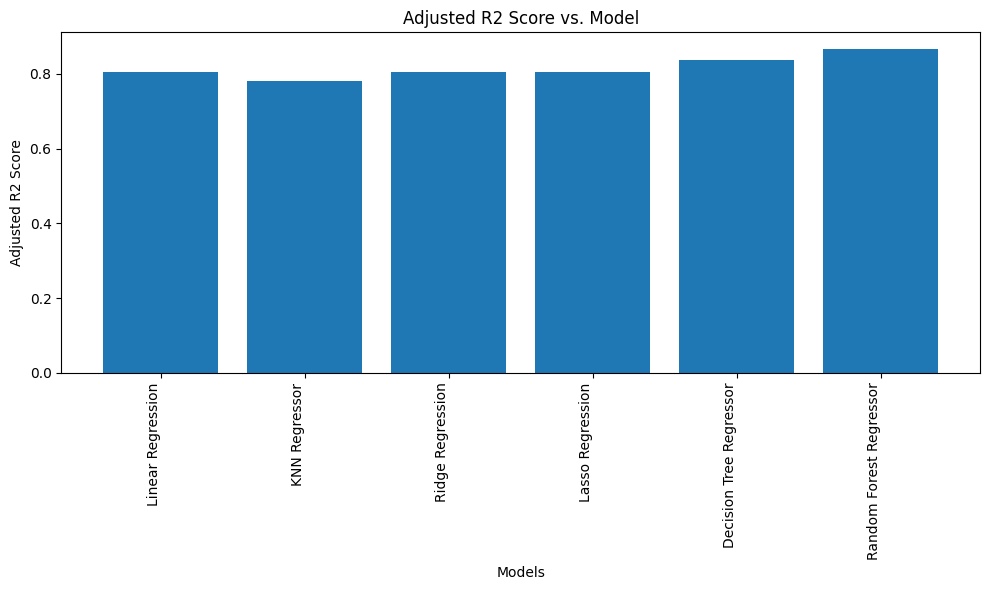

In [61]:
adjusted_r2_scores = {
    'Linear Regression':adjusted_r2_lr,
     'KNN Regressor':adjusted_r2_score_knn,
    'Ridge Regression': adjusted_r2_score_ridge,
    'Lasso Regression':adjusted_r2_score_lasso,
    'Decision Tree Regressor': adjusted_r2_score_dtree,
    'Random Forest Regressor': adjusted_r2_score_rf
}


models = list(adjusted_r2_scores.keys())
r2_scores = list(adjusted_r2_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores)
plt.xlabel('Models')
plt.ylabel('Adjusted R2 Score')
plt.title('Adjusted R2 Score vs. Model')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [62]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00


In [63]:
import optuna

In [64]:
def objective(trial):
    model_name = trial.suggest_categorical('model', ['RandomForest', 'DecisionTree'])

    if model_name == 'RandomForest':
        # Hyperparameters for Random Forest
        n_estimators = trial.suggest_int('n_estimators', 100, 1000)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=0
        )

    elif model_name == 'DecisionTree':
        # Hyperparameters for Decision Tree
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

        model = DecisionTreeRegressor(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=0
        )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return -rmse


In [65]:
# Create Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-11-10 12:10:09,794] A new study created in memory with name: no-name-0e2ed120-af21-4f82-b9ad-9f265307eb8a
[I 2024-11-10 12:10:32,059] Trial 0 finished with value: -15135.215774583325 and parameters: {'model': 'RandomForest', 'n_estimators': 885, 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 0 with value: -15135.215774583325.
[I 2024-11-10 12:10:48,905] Trial 1 finished with value: -15397.083315451431 and parameters: {'model': 'RandomForest', 'n_estimators': 706, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with value: -15135.215774583325.
[I 2024-11-10 12:10:48,962] Trial 2 finished with value: -16358.33493960416 and parameters: {'model': 'DecisionTree', 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 0 with value: -15135.215774583325.
[I 2024-11-10 12:10:49,016] Trial 3 finished with value: -16105.016365576885 and parameters: {'model': 'DecisionTree', 'max_depth': 9, 'min_samples

In [66]:
# Print best parameters and score
print('Best parameters:', study.best_params)
print('Best rmse:', study.best_value)

Best parameters: {'model': 'RandomForest', 'n_estimators': 415, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 1}
Best rmse: -14427.02174600924


##RANDOM FORESST CLASSIFIER(FINAL MODEL TESTING)

In [67]:
rf = RandomForestRegressor(
    n_estimators=398,
    max_depth=11,
    min_samples_split=7,
    min_samples_leaf=1,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (n - 1) / (n - p - 1)

print("Adjusted R2 score:", adjusted_r2)

Adjusted R2 score: 0.8740236103029723


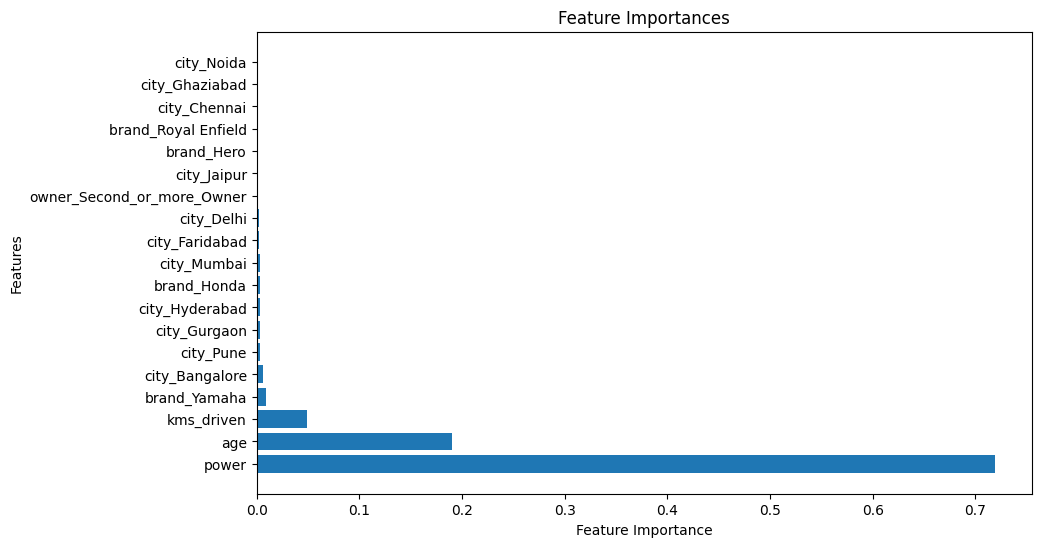

In [68]:
# prompt: plot a graph with the best features in one axis

import matplotlib.pyplot as plt

# Assuming you have a list of feature importances from your model
feature_importances = rf.feature_importances_  # Replace 'rf' with your model

# Get feature names (assuming they are in X_train.columns)
feature_names = X_train.columns

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = [feature_importances[i] for i in sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

## The three important features are:
1.power

2.age

3.Brand
